# Indian Car Price Regression Analysis

Regression analysis to predict selling prices of cars. Data set is from India and reported in IRP and KM - converted to USD and MI to better interpret results.

In [31]:
#importing packages to read in csv files and begin exploratory data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Importing

In [32]:
#reading in data files
df1 = pd.read_csv('Data/CAR DETAILS FROM CAR DEKHO.csv', index_col = 0)
df1.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
name,,,,,,,
Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [33]:
#reading in second data file
df2 = pd.read_csv('Data/car data.csv', index_col = 0)
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,,,,,,,,
ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [34]:
#reading in third data file, we will use this data set for further analysis as it provides more detail than other two.
df = pd.read_csv('Data/Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Data Cleaning

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [36]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [37]:
df.dropna(inplace = True)

In [38]:
df.describe()

,year,selling_price,km_driven,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [39]:
#prices are listed in Indian Rupee and gas mileage metrics are in kilometers - we will convert to USD and MPG
INR_USD = 0.013 #as of 7/16/21
df['selling_price_usd'] = df['selling_price'] * INR_USD

KM_MI = 0.621371 #converting KM to miles
df['mi_driven'] = df['km_driven'] * KM_MI


In [40]:
#converting mileage to mpg
df['mileage'] = [x[:-5] for x in df['mileage']] #removing text
df['mileage'] = df['mileage'].astype(float) #changing type to floats
df['mileage_mpg'] = df['mileage'] / 0.425143707 #kmpl to mpg conversion 

In [41]:
#converting engine and max power to floats
df['engine'] = [x[:-3] for x in df['engine']] #removing text
df['engine'] = df['engine'].astype(float) #changing type to floats
df['max_power'] = [x[:-4] for x in df['max_power']] #removing text
df['max_power'] = df['max_power'].astype(float) #changing type to floats

In [42]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_usd,mi_driven,mileage_mpg
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,5850.0,90409.4805,55.040213
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,4810.0,74564.5200,49.724363
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,2054.0,86991.9400,41.632981
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,2925.0,78914.1170,54.099354
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,1690.0,74564.5200,37.869548


In [43]:
df = df[['name', 'year', 'selling_price_usd', 'mi_driven', 'mileage_mpg', 'fuel', 'seller_type', 'transmission', 'owner', 'engine', 'max_power', 'seats']]

In [44]:
df.head()

,name,year,selling_price_usd,mi_driven,mileage_mpg,fuel,seller_type,transmission,owner,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,5850.0,90409.4805,55.040213,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4810.0,74564.5200,49.724363,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,2054.0,86991.9400,41.632981,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,2925.0,78914.1170,54.099354,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,1690.0,74564.5200,37.869548,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0


## Exploratory Data Analysis

In [45]:
#breaking down name into just maker
# df['name'] = df['name'].str.split()
df['maker'] = [x[0] for x in df['name'].str.split()]

In [46]:
df.head()

,name,year,selling_price_usd,mi_driven,mileage_mpg,fuel,seller_type,transmission,owner,engine,max_power,seats,maker
0,Maruti Swift Dzire VDI,2014,5850.0,90409.4805,55.040213,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,4810.0,74564.5200,49.724363,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,2054.0,86991.9400,41.632981,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,2925.0,78914.1170,54.099354,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,1690.0,74564.5200,37.869548,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0,Maruti


Text(0.5, 1.0, 'year')

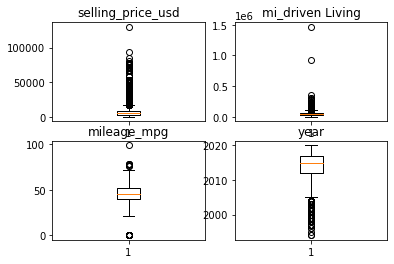

In [54]:
#outlier evaluation
fig, axs = plt.subplots(2, 2)
axs[0, 0].boxplot(df.selling_price_usd,)
axs[0, 0].set_title('selling_price_usd')
axs[0, 1].boxplot(df.mi_driven,)
axs[0, 1].set_title('mi_driven Living')
axs[1, 0].boxplot(df.mileage_mpg,)
axs[1, 0].set_title('mileage_mpg')
axs[1, 1].boxplot(df.year,)
axs[1, 1].set_title('year')

In [60]:
df.describe(percentiles =[.25,.50,.75,.9,.95,.99])

,year,selling_price_usd,mi_driven,mileage_mpg,engine,max_power,seats
count,7906.000000,7906.000000,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,8447.578371,4.299183e+04,45.678345,1458.708829,91.587374,5.416393
std,3.863695,10576.575729,3.528909e+04,9.493880,503.893057,35.747216,0.959208
min,1994.000000,389.987000,6.213710e-01,0.000000,624.000000,32.800000,2.000000
25%,2012.000000,3510.000000,2.174799e+04,39.469007,1197.000000,68.050000,5.000000
50%,2015.000000,5850.000000,3.728226e+04,45.396415,1248.000000,82.000000,5.000000
75%,2017.000000,8970.000000,5.929433e+04,52.499895,1582.000000,102.000000,5.000000
90%,2018.000000,13650.000000,7.456452e+04,58.098002,2198.500000,140.000000,7.000000
95%,2019.000000,26000.000000,9.320565e+04,60.755927,2499.000000,171.500000,7.000000
99%,2019.000000,67600.000000,1.398085e+05,66.800942,2967.000000,214.032000,9.000000


<AxesSubplot:xlabel='year', ylabel='selling_price_usd'>

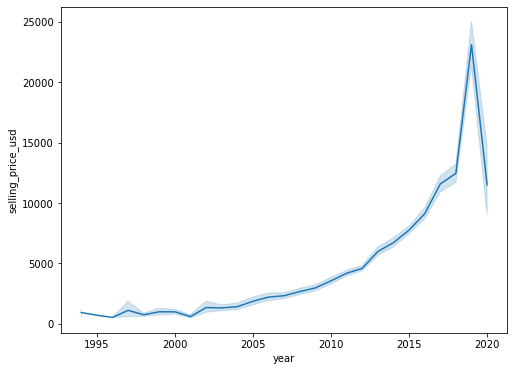

In [47]:
#lineplot showing how manufacturing year impacts resale value
fig, ax = plt.subplots(figsize = (8,6))
sns.lineplot(x = df['year'], y = df['selling_price_usd'])

<AxesSubplot:xlabel='mi_driven', ylabel='selling_price_usd'>

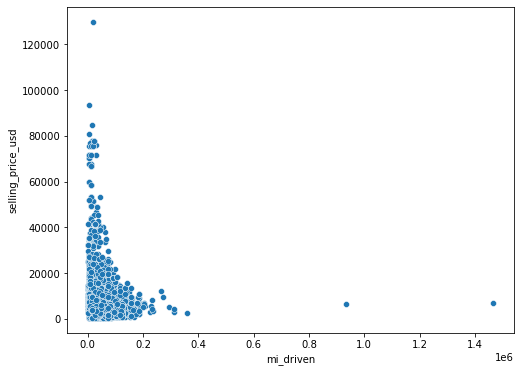

In [48]:
#scatterplot showing total miles driven impacting car price
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(x = df['mi_driven'], y = df['selling_price_usd'])

<AxesSubplot:xlabel='selling_price_usd', ylabel='Count'>

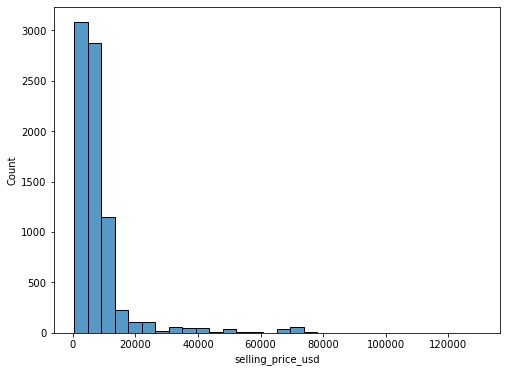

In [49]:
#histogram plotting distriubution of car prices
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(df.selling_price_usd, bins = 30)

/Users/ryanlewis/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '1994'),
  Text(1, 0, '1995'),
  Text(2, 0, '1996'),
  Text(3, 0, '1997'),
  Text(4, 0, '1998'),
  Text(5, 0, '1999'),
  Text(6, 0, '2000'),
  Text(7, 0, '2001'),
  Text(8, 0, '2002'),
  Text(9, 0, '2003'),
  Text(10, 0, '2004'),
  Text(11, 0, '2005'),
  Text(12, 0, '2006'),
  Text(13, 0, '2007'),
  Text(14, 0, '2008'),
  Text(15, 0, '2009'),
  Text(16, 0, '2010'),
  Text(17, 0, '2011'),
  Text(18, 0, '2012'),
  Text(19, 0, '2013'),
  Text(20, 0, '2014'),
  Text(21, 0, '2015'),
  Text(22, 0, '2016'),
  Text(23, 0, '2017'),
  Text(24, 0, '2018'),
  Text(25, 0, '2019'),
  Text(26, 0, '2020')])

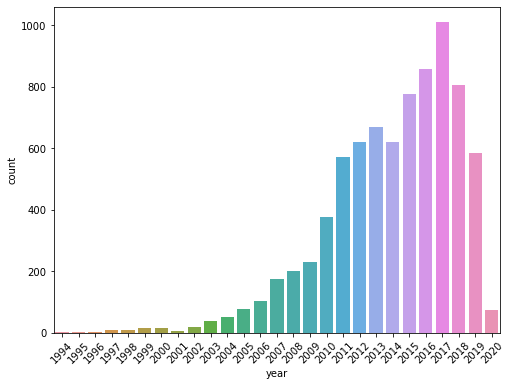

In [75]:
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(df.year)
plt.xticks(rotation = 45)

/Users/ryanlewis/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '1994'),
  Text(1, 0, '1995'),
  Text(2, 0, '1996'),
  Text(3, 0, '1997'),
  Text(4, 0, '1998'),
  Text(5, 0, '1999'),
  Text(6, 0, '2000'),
  Text(7, 0, '2001'),
  Text(8, 0, '2002'),
  Text(9, 0, '2003'),
  Text(10, 0, '2004'),
  Text(11, 0, '2005'),
  Text(12, 0, '2006'),
  Text(13, 0, '2007'),
  Text(14, 0, '2008'),
  Text(15, 0, '2009'),
  Text(16, 0, '2010'),
  Text(17, 0, '2011'),
  Text(18, 0, '2012'),
  Text(19, 0, '2013'),
  Text(20, 0, '2014'),
  Text(21, 0, '2015'),
  Text(22, 0, '2016'),
  Text(23, 0, '2017'),
  Text(24, 0, '2018'),
  Text(25, 0, '2019'),
  Text(26, 0, '2020')])

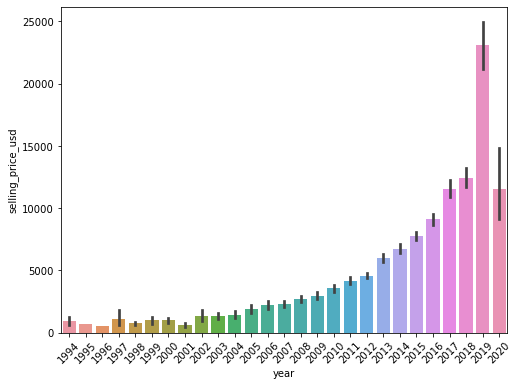

In [72]:
#histogram plotting distribution of manufacturing year of cars
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(df.year,df.selling_price_usd)
plt.xticks(rotation = 45)

/Users/ryanlewis/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='owner', ylabel='count'>

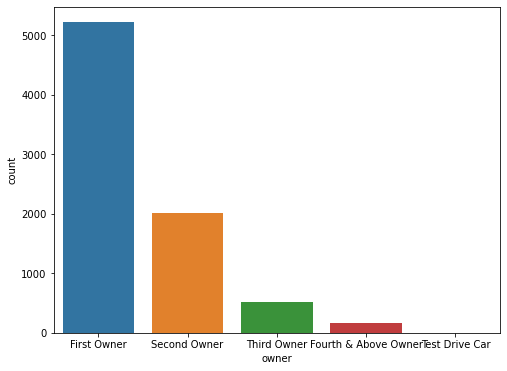

In [73]:
#histogram showing distribution of car ownership
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(df.owner)

/Users/ryanlewis/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='owner', ylabel='selling_price_usd'>

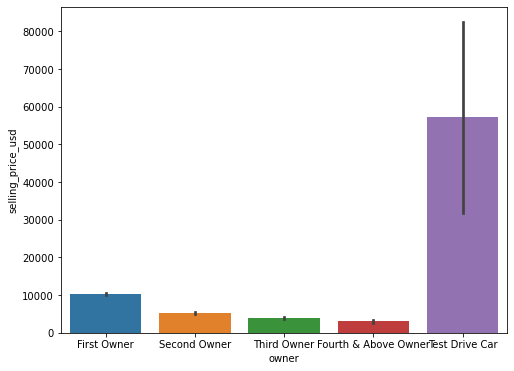

In [79]:
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(df.owner, df.selling_price_usd)

/Users/ryanlewis/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transmission', ylabel='count'>

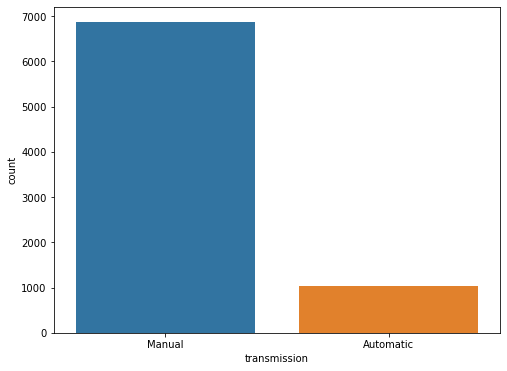

In [76]:
#histogram showing the breakdown of transmission types
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(df.transmission)

/Users/ryanlewis/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transmission', ylabel='selling_price_usd'>

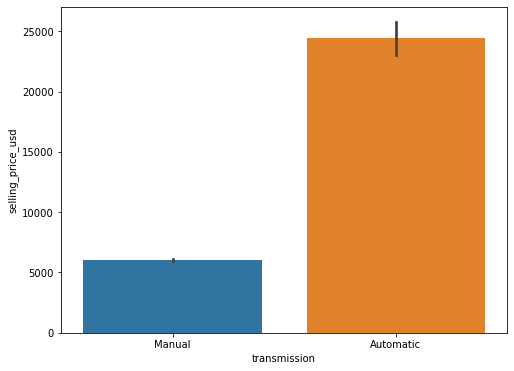

In [78]:
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(df.transmission, df.selling_price_usd)

/Users/ryanlewis/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='maker', ylabel='count'>

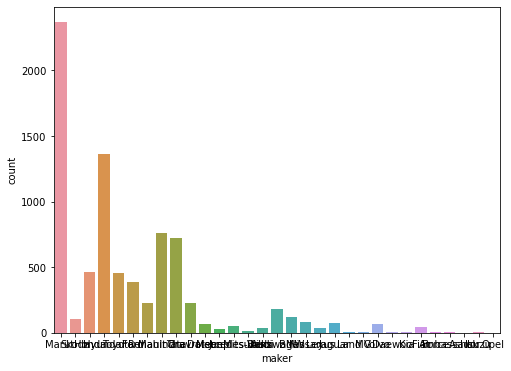

In [92]:
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(df.maker)

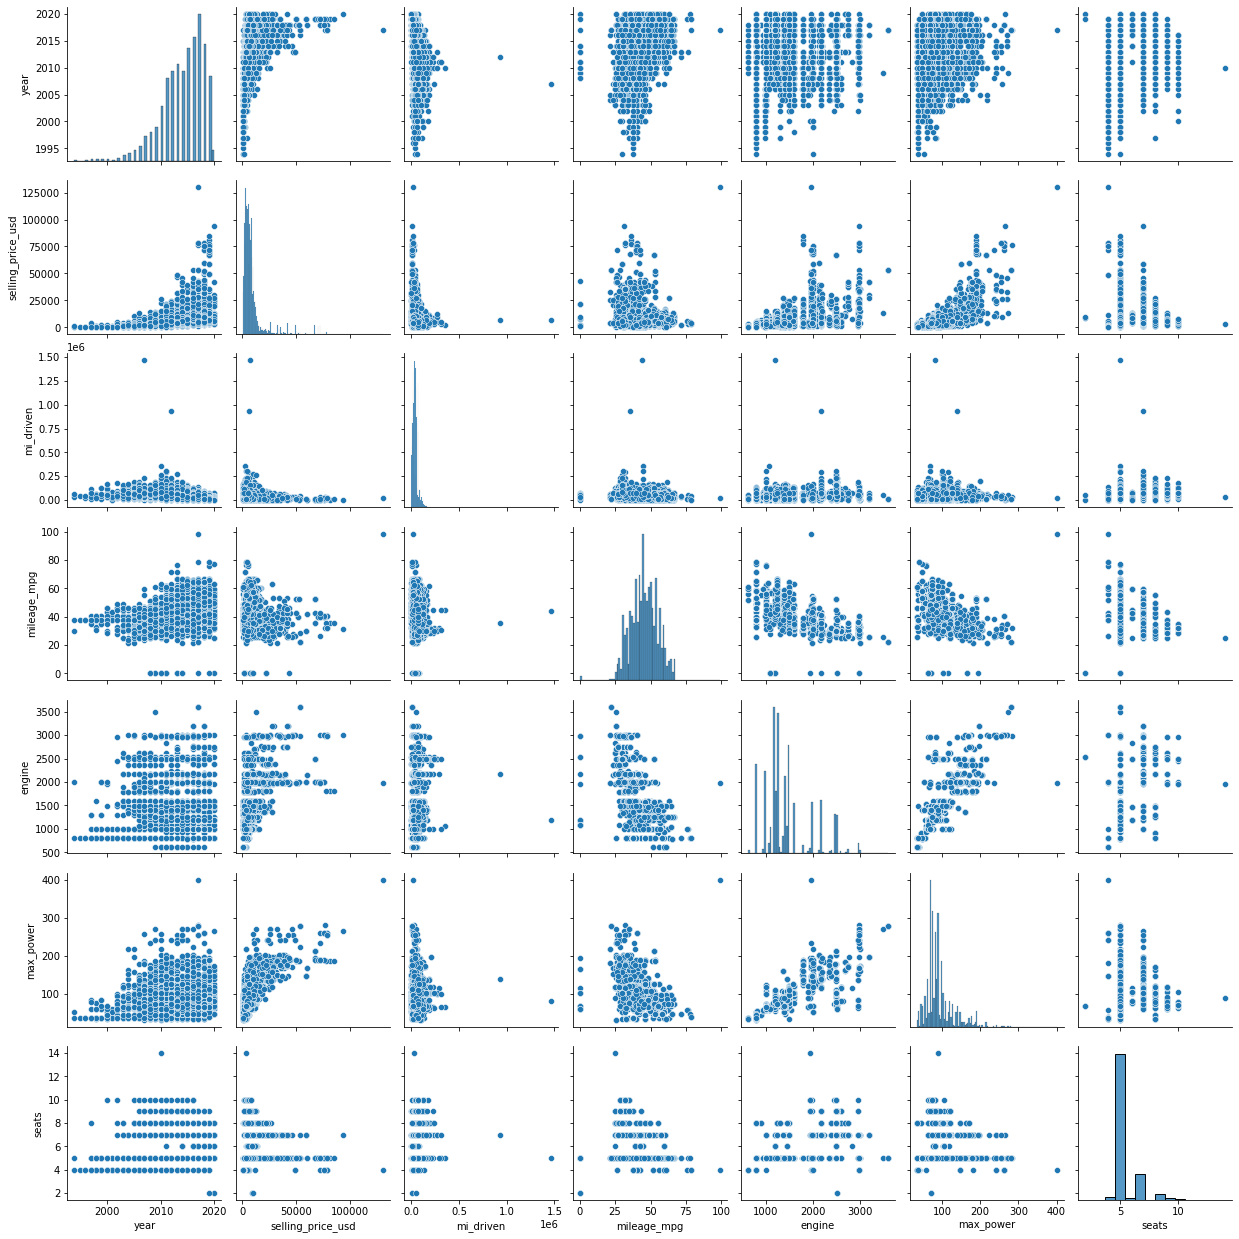

In [53]:
sns.pairplot(df)

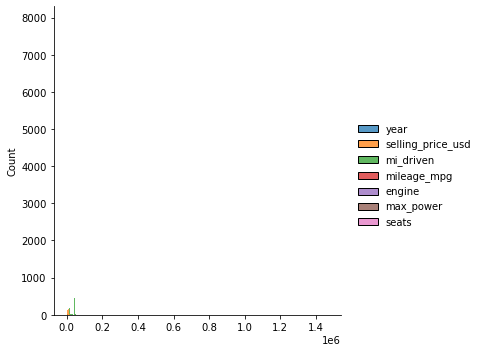

In [55]:
sns.displot(df)

<AxesSubplot:>

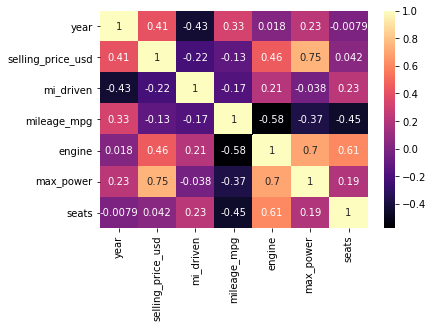

In [77]:
sns.heatmap(df.corr(), annot = True, cmap='magma')

<AxesSubplot:xlabel='max_power', ylabel='selling_price_usd'>

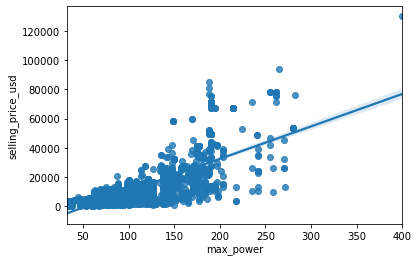

In [84]:
sns.regplot(df.max_power, df.selling_price_usd)

/Users/ryanlewis/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


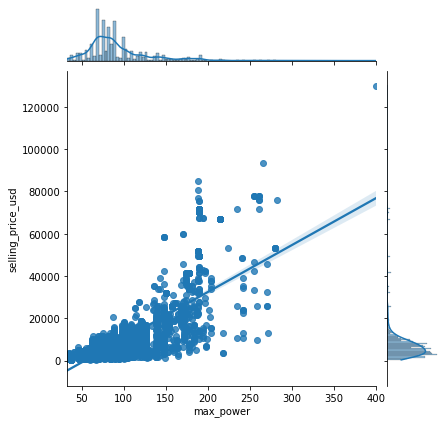

In [85]:
sns.jointplot(df.max_power, df.selling_price_usd, kind = 'reg')

/Users/ryanlewis/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine', ylabel='selling_price_usd'>

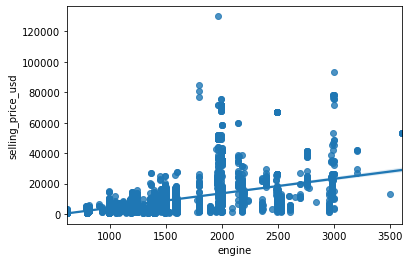

In [81]:
sns.regplot(df.engine, df.selling_price_usd)

## Feature Engineering

Engine and power show to have the highest correlation with selling price. No features show any over correlation with the target or each other.

We will start by dummying the categorical variables and building a basic model once our continuous variables are scaled. We will revist feature engineering after analyzing these results.


### Categorical Features

In [86]:
df.columns

Index(['name', 'year', 'selling_price_usd', 'mi_driven', 'mileage_mpg', 'fuel',
       'seller_type', 'transmission', 'owner', 'engine', 'max_power', 'seats',
       'maker'],
      dtype='object')

In [95]:
model_df = pd.get_dummies(df, columns = ['fuel', 'seller_type', 'transmission', 'owner', 'maker'], drop_first =True)
model_df.head()

,name,year,selling_price_usd,mi_driven,mileage_mpg,engine,max_power,seats,fuel_Diesel,fuel_LPG,...,maker_Mercedes-Benz,maker_Mitsubishi,maker_Nissan,maker_Opel,maker_Renault,maker_Skoda,maker_Tata,maker_Toyota,maker_Volkswagen,maker_Volvo
0,Maruti Swift Dzire VDI,2014,5850.0,90409.4805,55.040213,1248.0,74.00,5.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,4810.0,74564.5200,49.724363,1498.0,103.52,5.0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,Honda City 2017-2020 EXi,2006,2054.0,86991.9400,41.632981,1497.0,78.00,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hyundai i20 Sportz Diesel,2010,2925.0,78914.1170,54.099354,1396.0,90.00,5.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Maruti Swift VXI BSIII,2007,1690.0,74564.5200,37.869548,1298.0,88.20,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
model_df.shape

(7906, 48)

In [103]:
from statsmodels.formula.api import ols

basic_model = ols(formula='selling_price_usd~year+mi_driven+mileage_mpg+engine+max_power+seats+C(fuel)+C(seller_type)+C(transmission)+C(owner)+C(maker)',data=df).fit()
basic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      selling_price_usd   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     993.2
Date:                Sun, 25 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:57:25   Log-Likelihood:                -76893.
No. Observations:                7906   AIC:                         1.539e+05
Df Residuals:                    7859   BIC:                         1.542e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                          -1.156e+06   3.53e+04    -32.749      0.000   -1.23e+06   -1.09e+06
C(fuel)[T.Diesel]                   1772.3810    575.204      3.081      0.002     644.828    2899.934
C(fuel)[T.LPG]                      1998.4151    896.780      2.228      0.026     240.488    3756.342
C(fuel)[T.Petrol]                    569.5327    578.162      0.985      0.325    -563.818    1702.884
C(seller_type)[T.Individual]        -725.4485    151.670     -4.783      0.000   -1022.761    -428.136
C(seller_type)[T.Trustmark Dealer]  -962.1838    316.282     -3.042      0.002   -1582.180    -342.188
C(transmission)[T.Manual]          -1255.8361    189.782     -6.617      0.000   -1627.860    -883.812
C(owner)[T.Fourth & Above Owner]    -280.1096    341.484     -0.820      0.412    -949.509     389.289
C(owner)[T.Second Owner]            -763.4123    118.952     -6.418      0.000    -996.589    -530.236
C(owner)[T.Test Drive Car]          3.205e+04   1865.168     17.181      0.000    2.84e+04    3.57e+04
C(owner)[T.Third Owner]             -455.3962    204.338     -2.229      0.026    -855.953     -54.840
C(maker)[T.Ashok]                  -4148.6894   4559.113     -0.910      0.363   -1.31e+04    4788.384
C(maker)[T.Audi]                    8633.1509   2165.548      3.987      0.000    4388.101    1.29e+04
C(maker)[T.BMW]                     2.935e+04   2101.174     13.967      0.000    2.52e+04    3.35e+04
C(maker)[T.Chevrolet]              -5730.0590   2062.943     -2.778      0.005   -9773.975   -1686.143
C(maker)[T.Daewoo]                  1679.1453   3119.262      0.538      0.590   -4435.438    7793.729
C(maker)[T.Datsun]                 -6190.0870   2113.847     -2.928      0.003   -1.03e+04   -2046.385
C(maker)[T.Fiat]                   -5722.9279   2141.159     -2.673      0.008   -9920.169   -1525.687
C(maker)[T.Force]                  -4647.5332   2634.766     -1.764      0.078   -9812.375     517.309
C(maker)[T.Ford]                   -4807.3206   2054.812     -2.340      0.019   -8835.298    -779.344
C(maker)[T.Honda]                  -4825.3986   2058.076     -2.345      0.019   -8859.776    -791.022
C(maker)[T.Hyundai]                -4727.4762   2050.607     -2.305      0.021   -8747.212    -707.741
C(maker)[T.Isuzu]                   3098.6082   2741.301      1.130      0.258   -2275.070    8472.287
C(maker)[T.Jaguar]                  1.412e+04   2119.511      6.662      0.000    9964.490    1.83e+04
C(maker)[T.Jeep]                    4891.0176   2188.410      2.235      0.025     601.152    9180.883
C(maker)[T.Kia]                      725.2088   2888.416      0.251      0.802   -4936.855    6387.273
C(maker)[T.Land]                     2.57e+04   2644.190      9.719      0.000    2.05e+04    3.

<AxesSubplot:>

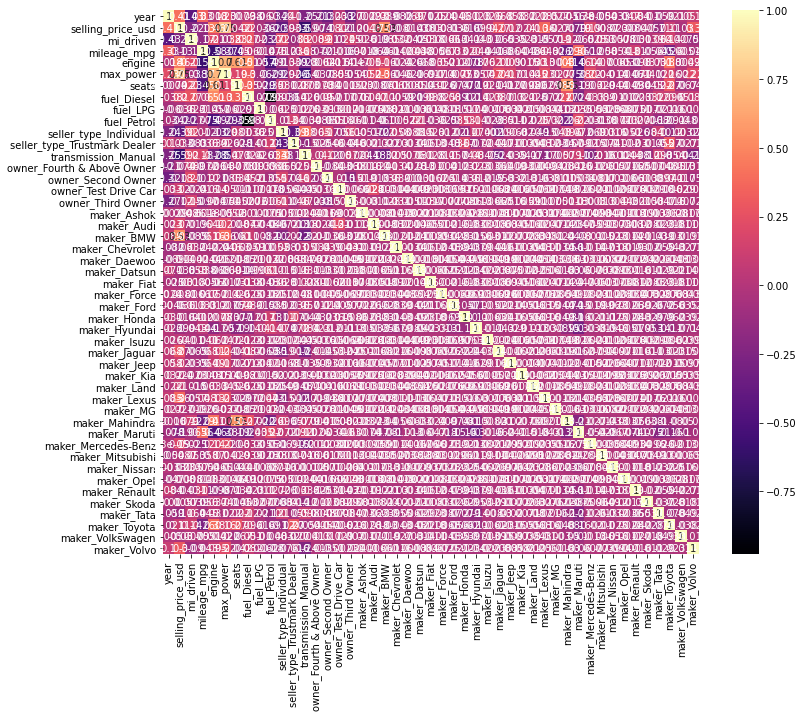

In [105]:
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(model_df.corr(), annot = True, cmap='magma')

### Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(model_df, test_size = 0.25, random_state = 42)